In [1]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

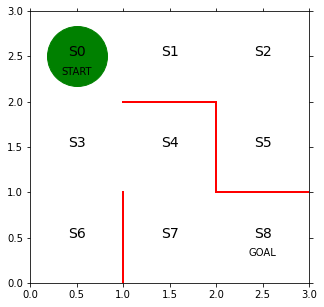

In [2]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [4]:
# 方策パラメータthetaを行動方策piにソフトマックス関数で変換する手法の定義


def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''

    beta = 1.0
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # thetaをexp(theta)へと変換

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # simpleに割合の計算の場合

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmaxで計算の場合

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

In [5]:
# 初期の方策pi_0を求める
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
# 行動aと1step移動後の状態sを求める関数を定義


def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]の確率に従って、directionが選択される
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return [action, s_next]

In [7]:
# 迷路を解く関数の定義、状態と行動の履歴を出力


def goal_maze_ret_s_a(pi):
    s = 0  # スタート地点
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 現在の状態（つまり一番最後なのでindex=-1）の行動を代入

        s_a_history.append([next_s, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return s_a_history

In [8]:
# 初期の方策で迷路を解く
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

[[0, 2], [3, 0], [0, 2], [3, 1], [4, 3], [3, 0], [0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [3, 1], [4, 3], [3, 2], [6, 0], [3, 2], [6, 0], [3, 1], [4, 3], [3, 1], [4, 3], [3, 0], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 0], [0, 2], [3, 2], [6, 0], [3, 1], [4, 3], [3, 0], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 0], [0, 1], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 0], [0, 2], [3, 1], [4, 3], [3, 1], [4, 2], [7, 0], [4, 3], [3, 2], [6, 0], [3, 0], [0, 2], [3, 0], [0, 2], [3, 0], [0, 1], [1, 3], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]
迷路を解くのにかかったステップ数は114です


In [9]:
# thetaの更新関数を定義します


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習率
    T = len(s_a_history) - 1  # ゴールまでの総ステップ数

    [m, n] = theta.shape  # thetaの行列サイズを取得
    delta_theta = theta.copy()  # Δthetaの元を作成、ポインタ参照なので、delta_theta = thetaはダメ

    # delta_thetaを要素ごとに求めます
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # thetaがnanでない場合

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 履歴から状態iのものを取り出すリスト内包表記です

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 状態iで行動jをしたものを取り出す

                N_i = len(SA_i)  # 状態iで行動した総回数
                N_ij = len(SA_ij)  # 状態iで行動jをとった回数
                
                # 初版では符号の正負に間違いがありました（修正日：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [10]:
# 方策の更新
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.5        0.5        0.        ]
 [0.         0.49890351 0.         0.50109649]
 [0.         0.         0.5002193  0.4997807 ]
 [0.33440613 0.33323483 0.33235905 0.        ]
 [0.         0.         0.49890351 0.50109649]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [11]:
# 方策勾配法で迷路を解く

# 初版で、def update_thetaに間違いがあった関係で、終了条件を変更します（修正日：180703）
#stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
stop_epsilon = 10**-4  # 10^-4よりも方策に変化が少なくなったら学習終了とする


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continueがFalseになるまで繰り返す
    s_a_history = goal_maze_ret_s_a(pi)  # 方策πで迷路内を探索した履歴を求める
    new_theta = update_theta(theta, pi, s_a_history)  # パラメータΘを更新
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 方策πの更新

    print(np.sum(np.abs(new_pi - pi)))  # 方策の変化を出力
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.007994406110895469
迷路を解くのにかかったステップ数は66です
0.020256519920013927
迷路を解くのにかかったステップ数は28です
0.005637339236087613
迷路を解くのにかかったステップ数は50です
0.007391455725196894
迷路を解くのにかかったステップ数は220です
0.010081489625695328
迷路を解くのにかかったステップ数は24です
0.009958658405062715
迷路を解くのにかかったステップ数は24です
0.011370885217851012
迷路を解くのにかかったステップ数は44です
0.009939891412593382
迷路を解くのにかかったステップ数は74です
0.0077025431550726275
迷路を解くのにかかったステップ数は40です
0.048786362946579676
迷路を解くのにかかったステップ数は4です
0.011514459564025414
迷路を解くのにかかったステップ数は30です
0.007512059745685029
迷路を解くのにかかったステップ数は110です
0.02014886712133973
迷路を解くのにかかったステップ数は12です
0.008319518681203397
迷路を解くのにかかったステップ数は42です
0.00603873555223805
迷路を解くのにかかったステップ数は122です
0.04823351137646231
迷路を解くのにかかったステップ数は4です
0.011454262764860945
迷路を解くのにかかったステップ数は70です
0.012053789710833374
迷路を解くのにかかったステップ数は16です
0.017643687810815323
迷路を解くのにかかったステップ数は22です
0.0120551515514834
迷路を解くのにかかったステップ数は62です
0.010219366246472184
迷路を解くのにかかったステップ数は38です
0.01340916619343474
迷路を解くのにかかったステップ数は62です
0.009635245889078603
迷路を解くのにかかったステップ数は60です
0.0183393064846

0.013629066590877065
迷路を解くのにかかったステップ数は8です
0.024566109435849637
迷路を解くのにかかったステップ数は4です
0.018202858526872256
迷路を解くのにかかったステップ数は12です
0.02055532997184409
迷路を解くのにかかったステップ数は12です
0.016537402056780698
迷路を解くのにかかったステップ数は26です
0.013095829167464629
迷路を解くのにかかったステップ数は16です
0.012976004860142304
迷路を解くのにかかったステップ数は14です
0.01543219784038577
迷路を解くのにかかったステップ数は6です
0.018606283861145156
迷路を解くのにかかったステップ数は6です
0.016951176599062145
迷路を解くのにかかったステップ数は8です
0.017961162284728993
迷路を解くのにかかったステップ数は8です
0.024700474286155794
迷路を解くのにかかったステップ数は10です
0.015023195496022379
迷路を解くのにかかったステップ数は6です
0.016641275795420823
迷路を解くのにかかったステップ数は46です
0.017768809749244607
迷路を解くのにかかったステップ数は12です
0.018463888243438448
迷路を解くのにかかったステップ数は8です
0.02415314980545033
迷路を解くのにかかったステップ数は4です
0.012921397137093643
迷路を解くのにかかったステップ数は10です
0.010765880828959296
迷路を解くのにかかったステップ数は14です
0.016566221426147443
迷路を解くのにかかったステップ数は12です
0.00952865055590671
迷路を解くのにかかったステップ数は24です
0.025612158351446784
迷路を解くのにかかったステップ数は6です
0.023811223475762144
迷路を解くのにかかったステップ数は4です
0.016912135245253757
迷路を解く

0.010677784560616133
迷路を解くのにかかったステップ数は6です
0.012995997065181744
迷路を解くのにかかったステップ数は6です
0.013452156897844889
迷路を解くのにかかったステップ数は6です
0.009663836825233793
迷路を解くのにかかったステップ数は8です
0.010363194053574082
迷路を解くのにかかったステップ数は4です
0.011922195857677398
迷路を解くのにかかったステップ数は8です
0.010304628109547104
迷路を解くのにかかったステップ数は4です
0.010176731384266363
迷路を解くのにかかったステップ数は4です
0.010050976717650928
迷路を解くのにかかったステップ数は4です
0.015122299547419477
迷路を解くのにかかったステップ数は8です
0.014121023044772085
迷路を解くのにかかったステップ数は24です
0.009975402007744341
迷路を解くのにかかったステップ数は4です
0.009853245095353083
迷路を解くのにかかったステップ数は4です
0.012647462830585307
迷路を解くのにかかったステップ数は6です
0.012956228790600488
迷路を解くのにかかったステップ数は6です
0.01290501601617916
迷路を解くのにかかったステップ数は6です
0.009754038206253854
迷路を解くのにかかったステップ数は6です
0.017154163115172913
迷路を解くのにかかったステップ数は8です
0.017178708079197233
迷路を解くのにかかったステップ数は8です
0.009909034251318297
迷路を解くのにかかったステップ数は4です
0.012519271460424003
迷路を解くのにかかったステップ数は6です
0.012939536620974232
迷路を解くのにかかったステップ数は6です
0.00980672916983849
迷路を解くのにかかったステップ数は4です
0.009686240825569972
迷路を解くのにかかったステッ

0.0034151510379070923
迷路を解くのにかかったステップ数は4です
0.011316705667661991
迷路を解くのにかかったステップ数は6です
0.003399702934565936
迷路を解くのにかかったステップ数は4です
0.0033724882747699914
迷路を解くのにかかったステップ数は4です
0.003345587968146567
迷路を解くのにかかったステップ数は4です
0.0033189973370863005
迷路を解くのにかかったステップ数は4です
0.0032927117880613144
迷路を解くのにかかったステップ数は4です
0.0032667268098738045
迷路を解くのにかかったステップ数は4です
0.0032410379719553725
迷路を解くのにかかったステップ数は4です
0.011468462991014339
迷路を解くのにかかったステップ数は12です
0.010555486839159516
迷路を解くのにかかったステップ数は8です
0.003305488748412841
迷路を解くのにかかったステップ数は4です
0.011169410468313823
迷路を解くのにかかったステップ数は6です
0.011178871102929679
迷路を解くのにかかったステップ数は6です
0.003309251385409724
迷路を解くのにかかったステップ数は4です
0.0032832369807306583
迷路を解くのにかかったステップ数は4です
0.003257517041009114
迷路を解くのにかかったステップ数は4です
0.0068872976107827305
迷路を解くのにかかったステップ数は6です
0.003253365801189595
迷路を解くのにかかったステップ数は4です
0.006966196634351045
迷路を解くのにかかったステップ数は6です
0.003253492851526145
迷路を解くのにかかったステップ数は4です
0.003228038748681397
迷路を解くのにかかったステップ数は4です
0.003202871959367866
迷路を解くのにかかったステップ数は4です
0.005783721955114597
迷路を解

0.0049434784207120774
迷路を解くのにかかったステップ数は6です
0.0017543744818979065
迷路を解くのにかかったステップ数は4です
0.0017438632787638852
迷路を解くのにかかったステップ数は4です
0.0017334446817851984
迷路を解くのにかかったステップ数は4です
0.0017231176207815474
迷路を解くのにかかったステップ数は4です
0.0017128810408000572
迷路を解くのにかかったステップ数は4です
0.0017027339018545057
迷路を解くのにかかったステップ数は4です
0.01680116687277447
迷路を解くのにかかったステップ数は14です
0.005970895354329091
迷路を解くのにかかったステップ数は8です
0.0017257954392496458
迷路を解くのにかかったステップ数は4です
0.011215927703100266
迷路を解くのにかかったステップ数は12です
0.001720178898904974
迷路を解くのにかかったステップ数は4です
0.006155910778416283
迷路を解くのにかかったステップ数は8です
0.004968245361151834
迷路を解くのにかかったステップ数は6です
0.005038388548071607
迷路を解くのにかかったステップ数は6です
0.0017792547652867793
迷路を解くのにかかったステップ数は4です
0.001768477832458766
迷路を解くのにかかったステップ数は4です
0.0017577970787974323
迷路を解くのにかかったステップ数は4です
0.004095244979595777
迷路を解くのにかかったステップ数は6です
0.0017570252799381791
迷路を解くのにかかったステップ数は4です
0.0017464656107817333
迷路を解くのにかかったステップ数は4です
0.0017359993649897001
迷路を解くのにかかったステップ数は4です
0.0017256254575827856
迷路を解くのにかかったステップ数は4です
0.00171534281910178

0.004443701674094969
迷路を解くのにかかったステップ数は8です
0.0009459443235468219
迷路を解くのにかかったステップ数は4です
0.0009416087752651507
迷路を解くのにかかったステップ数は4です
0.0037331464392506217
迷路を解くのにかかったステップ数は6です
0.007826677115223578
迷路を解くのにかかったステップ数は14です
0.0009723293557942353
迷路を解くのにかかったステップ数は4です
0.0009677990096968354
迷路を解くのにかかったステップ数は4です
0.0009633003469604155
迷路を解くのにかかったステップ数は4です
0.0009588330720074964
迷路を解くのにかかったステップ数は4です
0.0009543968927024013
迷路を解くのにかかったステップ数は4です
0.0049288183281847
迷路を解くのにかかったステップ数は10です
0.0009688085551145184
迷路を解くのにかかったステップ数は4です
0.000964309694865436
迷路を解くのにかかったステップ数は4です
0.0009598421768562439
迷路を解くのにかかったステップ数は4です
0.002807605906138176
迷路を解くのにかかったステップ数は6です
0.0028537390159522925
迷路を解くのにかかったステップ数は6です
0.0009682065879362371
迷路を解くのにかかったステップ数は4です
0.0009637379816765587
迷路を解くのにかかったステップ数は4です
0.0009593002303458463
迷路を解くのにかかったステップ数は4です
0.0009548930503296207
迷路を解くのにかかったステップ数は4です
0.0009505161612637612
迷路を解くのにかかったステップ数は4です
0.0009461692859912899
迷路を解くのにかかったステップ数は4です
0.0009418521505177128
迷路を解くのにかかったステップ数は4です
0.00093756448396

0.0006164370106107042
迷路を解くのにかかったステップ数は4です
0.0006141845637373244
迷路を解くのにかかったステップ数は4です
0.0006119443565322305
迷路を解くのにかかったステップ数は4です
0.0006097163008436692
迷路を解くのにかかったステップ数は4です
0.0006075003093115455
迷路を解くのにかかったステップ数は4です
0.000605296295354954
迷路を解くのにかかったステップ数は4です
0.0029544380511532554
迷路を解くのにかかったステップ数は6です
0.0027876486777417935
迷路を解くのにかかったステップ数は6です
0.0006193457205797177
迷路を解くのにかかったステップ数は4です
0.0024725978779964984
迷路を解くのにかかったステップ数は6です
0.0006230191985040906
迷路を解くのにかかったステップ数は4です
0.0006207262343395532
迷路を解くのにかかったステップ数は4です
0.0006184458321011124
迷路を解くのにかかったステップ数は4です
0.0028254253900676686
迷路を解くのにかかったステップ数は6です
0.0025053751461351394
迷路を解くのにかかったステップ数は6です
0.0006298651004403993
迷路を解くのにかかったステップ数は4です
0.0006275358710354402
迷路を解くのにかかったステップ数は4です
0.0006252194530828557
迷路を解くのにかかったステップ数は4です
0.000622915753209323
迷路を解くのにかかったステップ数は4です
0.0006206246788885358
迷路を解くのにかかったステップ数は4です
0.0006183461384294021
迷路を解くのにかかったステップ数は4です
0.0006160800409712001
迷路を解くのにかかったステップ数は4です
0.000613826296469857
迷路を解くのにかかったステップ数は4です
0.000611584815

0.0004078583566595219
迷路を解くのにかかったステップ数は4です
0.00040663237761137325
迷路を解くのにかかったステップ数は4です
0.00040541191444235306
迷路を解くのにかかったステップ数は4です
0.00040419693404350823
迷路を解くのにかかったステップ数は4です
0.00040298740355130744
迷路を解くのにかかったステップ数は4です
0.0004017832903525989
迷路を解くのにかかったステップ数は4です
0.0004005845620759091
迷路を解くのにかかったステップ数は4です
0.0003993911865937637
迷路を解くのにかかったステップ数は4です
0.0003982031320176327
迷路を解くのにかかったステップ数は4です
0.0003970203666977777
迷路を解くのにかかったステップ数は4です
0.00039584285922001847
迷路を解くのにかかったステップ数は4です
0.00039467057840337355
迷路を解くのにかかったステップ数は4です
0.00039350349329893286
迷路を解くのにかかったステップ数は4です
0.00039234157318747756
迷路を解くのにかかったステップ数は4です
0.0024197974560914957
迷路を解くのにかかったステップ数は6です
0.00039799508863195415
迷路を解くのにかかったステップ数は4です
0.00039680804535487807
迷路を解くのにかかったステップ数は4です
0.0003956263170849274
迷路を解くのにかかったステップ数は4です
0.0003944498719775924
迷路を解くのにかかったステップ数は4です
0.0019318022016643621
迷路を解くのにかかったステップ数は6です
0.0021237094432197505
迷路を解くのにかかったステップ数は6です
0.00040137951086180804
迷路を解くのにかかったステップ数は4です
0.00040018102738767145
迷路を解くのにかかったステップ数は4です

0.00033950807785227896
迷路を解くのにかかったステップ数は4です
0.0003385688398751842
迷路を解くのにかかったステップ数は4です
0.00033763350292081995
迷路を解くのにかかったステップ数は4です
0.0003367020453383697
迷路を解くのにかかったステップ数は4です
0.0003357744456265188
迷路を解くのにかかったステップ数は4です
0.0003348506824328301
迷路を解くのにかかったステップ数は4です
0.00033393073455500327
迷路を解くのにかかったステップ数は4です
0.0003330145809347998
迷路を解くのにかかったステップ数は4です
0.00033210220066150903
迷路を解くのにかかったステップ数は4です
0.0003311935729684544
迷路を解くのにかかったステップ数は4です
0.0003302886772312136
迷路を解くのにかかったステップ数は4です
0.0003293874929694608
迷路を解くのにかかったステップ数は4です
0.00032848999984154414
迷路を解くのにかかったステップ数は4です
0.0003275961776463693
迷路を解くのにかかったステップ数は4です
0.0003267060063217829
迷路を解くのにかかったステップ数は4です
0.0003258194659427373
迷路を解くのにかかったステップ数は4です
0.0003249365367198609
迷路を解くのにかかったステップ数は4です
0.00032405719900021127
迷路を解くのにかかったステップ数は4です
0.0003231814332629937
迷路を解くのにかかったステップ数は4です
0.0003223092201222223
迷路を解くのにかかったステップ数は4です
0.00032144054032314656
迷路を解くのにかかったステップ数は4です
0.0020437661996228103
迷路を解くのにかかったステップ数は6です
0.0003252781182110642
迷路を解くのにかかったステップ数は4です
0.00

0.00026139273164416457
迷路を解くのにかかったステップ数は4です
0.00026075705488008347
迷路を解くのにかかったステップ数は4です
0.0002601236997555184
迷路を解くのにかかったステップ数は4です
0.00025949265493348597
迷路を解くのにかかったステップ数は4です
0.0002588639091490319
迷路を解くのにかかったステップ数は4です
0.0002582374512038431
迷路を解くのにかかったステップ数は4です
0.0002576132699696962
迷路を解くのにかかったステップ数は4です
0.00025699135438461695
迷路を解くのにかかったステップ数は4です
0.0002563716934569256
迷路を解くのにかかったステップ数は4です
0.0002557542762577948
迷路を解くのにかかったステップ数は4です
0.0002551390919279077
迷路を解くのにかかったステップ数は4です
0.001930761079104502
迷路を解くのにかかったステップ数は6です
0.00025909260298099743
迷路を解くのにかかったステップ数は4です
0.00025846279109753047
迷路を解くのにかかったステップ数は4です
0.0002578352847228578
迷路を解くのにかかったステップ数は4です
0.0002572100725441624
迷路を解くのにかかったステップ数は4です
0.0002565871433173484
迷路を解くのにかかったステップ数は4です
0.0017330935189480198
迷路を解くのにかかったステップ数は6です
0.00025929663098569165
迷路を解くのにかかったステップ数は4です
0.0002586662693563266
迷路を解くのにかかったステップ数は4です
0.0002580382141315618
迷路を解くのにかかったステップ数は4です
0.00025741245400725046
迷路を解くのにかかったステップ数は4です
0.0017684508168483958
迷路を解くのにかかったステップ数は6です
0.00

0.002195903425077925
迷路を解くのにかかったステップ数は8です
0.00022259404337849308
迷路を解くのにかかったステップ数は4です
0.00022208524606554154
迷路を解くのにかかったステップ数は4です
0.0002215782094704289
迷路を解くのにかかったステップ数は4です
0.00022107292540399746
迷路を解くのにかかったステップ数は4です
0.0002205693857229643
迷路を解くのにかかったステップ数は4です
0.00022006758233421297
迷路を解くのにかかったステップ数は4です
0.0002195675071890689
迷路を解くのにかかったステップ数は4です
0.00021906915228967969
迷路を解くのにかかったステップ数は4です
0.0002185725096796893
迷路を解くのにかかったステップ数は4です
0.00021807757145387956
迷路を解くのにかかったステップ数は4です
0.00021758432975029635
迷路を解くのにかかったステップ数は4です
0.00021709277675228435
迷路を解くのにかかったステップ数は4です
0.0014105767393673436
迷路を解くのにかかったステップ数は6です
0.00021890574588712304
迷路を解くのにかかったステップ数は4です
0.0002184107866907998
迷路を解くのにかかったステップ数は4です
0.00021791751908297255
迷路を解くのにかかったステップ数は4です
0.00021742593530461353
迷路を解くのにかかったステップ数は4です
0.00021693602764088354
迷路を解くのにかかったステップ数は4です
0.017551935893615193
迷路を解くのにかかったステップ数は10です
0.0014201576804675087
迷路を解くのにかかったステップ数は6です
0.001757606411641733
迷路を解くのにかかったステップ数は6です
0.00022357210110979936
迷路を解くのにかかったステップ数は4です


0.00022218889631733796
迷路を解くのにかかったステップ数は4です
0.00022167466905619916
迷路を解くのにかかったステップ数は4です
0.00022116226175523945
迷路を解くのにかかったステップ数は4です
0.00022065166566930666
迷路を解くのにかかったステップ数は4です
0.00022014287210629126
迷路を解くのにかかったステップ数は4です
0.00021963587242738482
迷路を解くのにかかったステップ数は4です
0.00021913065804735933
迷路を解くのにかかったステップ数は4です
0.00021862722043038477
迷路を解くのにかかったステップ数は4です
0.0002181255510956305
迷路を解くのにかかったステップ数は4です
0.00021762564161180095
迷路を解くのにかかったステップ数は4です
0.000217127483599382
迷路を解くのにかかったステップ数は4です
0.00021663106872850564
迷路を解くのにかかったステップ数は4です
0.0002161363887212102
迷路を解くのにかかったステップ数は4です
0.0002156434353482537
迷路を解くのにかかったステップ数は4です
0.00021515220042977665
迷路を解くのにかかったステップ数は4です
0.0014043926810883844
迷路を解くのにかかったステップ数は6です
0.00021701534671599194
迷路を解くのにかかったステップ数は4です
0.000216520696102113
迷路を解くのにかかったステップ数は4です
0.00021602776561069348
迷路を解くのにかかったステップ数は4です
0.0002155365471380715
迷路を解くのにかかったステップ数は4です
0.00021504703262790852
迷路を解くのにかかったステップ数は4です
0.00021455921407054906
迷路を解くのにかかったステップ数は4です
0.000214073083506695
迷路を解くのにかかったステップ数は4です

0.00019673288264511653
迷路を解くのにかかったステップ数は4です
0.00019629949533808352
迷路を解くのにかかったステップ数は4です
0.0001958675771398955
迷路を解くのにかかったステップ数は4です
0.0001954371212570076
迷路を解くのにかかったステップ数は4です
0.00019500812093665998
迷路を解くのにかかったステップ数は4です
0.00019458056946486564
迷路を解くのにかかったステップ数は4です
0.00019415446016857012
迷路を解くのにかかったステップ数は4です
0.00019372978641142395
迷路を解くのにかかったステップ数は4です
0.00019330654159926616
迷路を解くのにかかったステップ数は4です
0.00019288471917375434
迷路を解くのにかかったステップ数は4です
0.0001924643126155097
迷路を解くのにかかったステップ数は4です
0.00019204531544521862
迷路を解くのにかかったステップ数は4です
0.0001916277212175143
迷路を解くのにかかったステップ数は4です
0.00019121152352806134
迷路を解くのにかかったステップ数は4です
0.00019079671600881823
迷路を解くのにかかったステップ数は4です
0.00019038329232696702
迷路を解くのにかかったステップ数は4です
0.00018997124618875746
迷路を解くのにかかったステップ数は4です
0.00018956057133601503
迷路を解くのにかかったステップ数は4です
0.00018915126154623457
迷路を解くのにかかったステップ数は4です
0.00018874331063372003
迷路を解くのにかかったステップ数は4です
0.00018833671244762248
迷路を解くのにかかったステップ数は4です
0.00018793146087371822
迷路を解くのにかかったステップ数は4です
0.00018752754983098266
迷路を解くのにかかったステ

迷路を解くのにかかったステップ数は4です
0.0001535966346313724
迷路を解くのにかかったステップ数は4です
0.0001533081744896983
迷路を解くのにかかったステップ数は4です
0.00015302052989002966
迷路を解くのにかかったステップ数は4です
0.00015273369774471135
迷路を解くのにかかったステップ数は4です
0.0001524476749806148
迷路を解くのにかかったステップ数は4です
0.00015216245854001408
迷路を解くのにかかったステップ数は4です
0.0001518780453781312
迷路を解くのにかかったステップ数は4です
0.0001515944324656862
迷路を解くのにかかったステップ数は4です
0.00015131161678771238
迷路を解くのにかかったステップ数は4です
0.00015102959534312767
迷路を解くのにかかったステップ数は4です
0.00015074836514538878
迷路を解くのにかかったステップ数は4です
0.00015046792322176948
迷路を解くのにかかったステップ数は4です
0.00015018826661432338
迷路を解くのにかかったステップ数は4です
0.00014990939237687247
迷路を解くのにかかったステップ数は4です
0.00014963129758021644
迷路を解くのにかかったステップ数は4です
0.00014935397930701706
迷路を解くのにかかったステップ数は4です
0.00014907743465291876
迷路を解くのにかかったステップ数は4です
0.00014880166072946469
迷路を解くのにかかったステップ数は4です
0.0014720719122364653
迷路を解くのにかかったステップ数は6です
0.0001512773073135236
迷路を解くのにかかったステップ数は4です
0.00015099426600590632
迷路を解くのにかかったステップ数は4です
0.00015071202404812883
迷路を解くのにかかったステップ数は4です
0.0001504305784078

0.00012077920621771966
迷路を解くのにかかったステップ数は4です
0.0001205750821890051
迷路を解くのにかかったステップ数は4です
0.00012037148216668785
迷路を解くのにかかったステップ数は4です
0.00012016840433495997
迷路を解くのにかかったステップ数は4です
0.00011996584688517276
迷路を解くのにかかったステップ数は4です
0.00011976380801620272
迷路を解くのにかかったステップ数は4です
0.00011956228593539876
迷路を解くのにかかったステップ数は4です
0.00011936127885824564
迷路を解くのにかかったステップ数は4です
0.00011916078500779151
迷路を解くのにかかったステップ数は4です
0.00011896080261371463
迷路を解くのにかかったステップ数は4です
0.00011876132991573904
迷路を解くのにかかったステップ数は4です
0.00011856236515899246
迷路を解くのにかかったステップ数は4です
0.00011836390659695183
迷路を解くのにかかったステップ数は4です
0.0001181659524920279
迷路を解くのにかかったステップ数は4です
0.00011796850111213224
迷路を解くのにかかったステップ数は4です
0.00011777155073410851
迷路を解くのにかかったステップ数は4です
0.0001175750996410263
迷路を解くのにかかったステップ数は4です
0.0001173791461253175
迷路を解くのにかかったステップ数は4です
0.00011718368848430416
迷路を解くのにかかったステップ数は4です
0.000116988725025257
迷路を解くのにかかったステップ数は4です
0.00011679425406104643
迷路を解くのにかかったステップ数は4です
0.00011660027391190847
迷路を解くのにかかったステップ数は4です
0.00011640678290586459
迷路を解くのにかかったステップ

In [12]:
# 最終的な方策を確認
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.011 0.989 0.   ]
 [0.    0.274 0.    0.726]
 [0.    0.    0.384 0.616]
 [0.01  0.979 0.011 0.   ]
 [0.    0.    0.983 0.017]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.016 0.984 0.    0.   ]]


In [13]:
# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate(i):
    # フレームごとの描画内容
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())